In [ ]:
import numpy as np
import pandas as pd
import importlib
import scrape_pdb
from collections import Counter
from scrape_pdb import pdb_parser

pdb_parser = pdb_parser(-1)
pdb_parser.print_stats()

df_atom = pdb_parser.df_atom
df_sheet = pdb_parser.df_sheet
df_helix = pdb_parser.df_helix


parsing all pdb in cullpdb_pc30_res3.0_R1.0_d191017_chains18877.gz
completed parsing 500 pdbs
completed parsing 1000 pdbs
completed parsing 1500 pdbs
completed parsing 2000 pdbs
completed parsing 2500 pdbs
completed parsing 3000 pdbs
completed parsing 3500 pdbs
completed parsing 4000 pdbs
completed parsing 4500 pdbs
completed parsing 5000 pdbs
completed parsing 5500 pdbs
completed parsing 6000 pdbs
completed parsing 6500 pdbs
completed parsing 7000 pdbs
completed parsing 7500 pdbs
completed parsing 8000 pdbs
completed parsing 8500 pdbs
completed parsing 9000 pdbs
completed parsing 9500 pdbs
completed parsing 10000 pdbs
completed parsing 10500 pdbs
completed parsing 11000 pdbs
completed parsing 11500 pdbs
completed parsing 12000 pdbs
completed parsing 12500 pdbs
completed parsing 13000 pdbs
completed parsing 13500 pdbs


1. Find the popularity of different kind of helices: read the data set and analyze it to find the
popularity of each type of helices. 

In [3]:
print("Helix Classes:",Counter(df_helix.helix_class))

Helix Classes: Counter({'1': 591, '5': 202})


Printed above are the classes of helices, shown with the number of times they appear in our helices dataframe. Here, we see that alpha-helix helices are the most popular in the helix classes, followed by 3-10, Polyproline, and lastly, Omega.

2. Analyze the amino acids that prefer to form/be part of helices. Does an AA prefer to
form/be part of specific type of helices?

In [4]:
# df_helix = pd.read_csv("df_export.csv", low_memory=False, header=0)
# df_helix.info()
print("Initial:",Counter(df_helix.init_res_name))
print("\nEnd",Counter(df_helix.end_res_name))

Initial: Counter({'PRO': 111, 'ALA': 83, 'GLU': 61, 'LEU': 61, 'VAL': 52, 'ILE': 41, 'ASP': 40, 'ARG': 39, 'PHE': 36, 'LYS': 36, 'SER': 35, 'TYR': 31, 'THR': 30, 'GLN': 28, 'GLY': 26, 'ASN': 25, 'MET': 18, 'TRP': 15, 'HIS': 13, 'CYS': 12})

End Counter({'LEU': 87, 'ALA': 80, 'GLU': 66, 'LYS': 61, 'ARG': 53, 'THR': 51, 'GLN': 46, 'SER': 45, 'ASN': 43, 'PHE': 41, 'ASP': 37, 'GLY': 31, 'VAL': 31, 'ILE': 27, 'TYR': 25, 'HIS': 24, 'MET': 20, 'CYS': 13, 'TRP': 11, 'MSE': 1})


Here, we see the most popular residues in the helices portion of the data. With a little research, we see that this counter data (printed above) is pretty accurate to what is stated in some research statements, especially in the End Counter. Residues like Leucine, Alanine, Lysine, Glutamate, and Asparagine are found in the top half of the most popular residues in the helices dataframe.

3. Analyze the length of helices (in terms of number of AAs). Is there any relation between
the type of a helix and its length?

In [5]:
df_helix.drop_duplicates(subset=["helix_class", "length"], keep="last")

,comment,end_chain_id,end_iCode,end_res_name,end_seq_num,helix_class,helix_id,init_chain_id,init_iCode,init_res_name,init_seq_num,length,protein_name,record_name,serial_number
16,,A,,ARG,197,5,6,A,,ARG,143,55,16VPA,HELIX,6
17,,A,,MET,247,1,7,A,,LEU,203,45,16VPA,HELIX,7
132,,A,,ASP,47,1,1,A,,ARG,13,35,1A92A,HELIX,1
192,,B,,ARG,1878,5,59,B,,ALA,1864,15,1A9XB,HELIX,59
210,,A,,PHE,195,5,9,A,,SER,176,20,1AC5A,HELIX,9
234,,A,,GLU,64,1,2,A,,GLU,36,29,1AEPA,HELIX,2
299,,A,,LYS,129,5,4,A,,SER,107,23,1ALUA,HELIX,4
301,,A,,ARG,182,1,6,A,,GLN,156,27,1ALUA,HELIX,6
319,,A,,CYS,133,5,5,A,,ARG,128,6,1AOLA,HELIX,5
343,,A,,THR,26,5,1,A,,THR,9,18,1ATGA,HELIX,1


Here, we see samples from all types of helices in this dataset: 1, 5, 7, and 10. We see a very slight correlation here. Alpha helices seem to usually be in lengths between 10 and 30, a bit reserved, while 3-10 helices seem to over shoot the prior lengths with their own range of lengths: 15 to 60, a little bit more widespread. As for the Polyproline and Omega helices, their lengths seem very minimal/small, compared to the previous two helices mentioned. We see lengths less than 10 residues here, but these types of helices can range from the lengths seen here to the ballpark of 15.

4. Analyze   the   torsion   angles   in   each   type   of helices.Build   something   similar   to Ramachandran plot but for different types of helices.

building coordinates...
build_coordinates_lookup took 20.399868965148926s.....


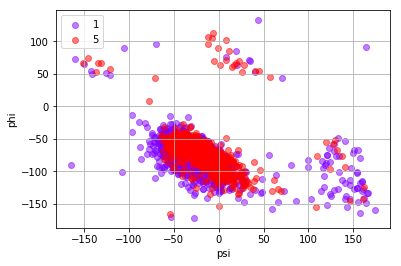

In [20]:
# building dictionary of protein coordinate map to be able to look up AA coordinates quicker!
from utilities import pdb_utilities
pdb_util = pdb_utilities(df_atom, df_helix, df_sheet)

df_ram = pdb_util.build_ramachandran_helices()
pdb_util.plot_ramachandran(df_ram, 'helix_class')

5. Analyze the amino acids that prefer to form/be part of beta-sheets. 

In [6]:
strands_df = df_sheet.drop_duplicates(subset=["protein_name", "sheet_id"], keep="last")
df_csv = strands_df.to_csv(r'C:\Users\g.m.de.la.torre\Documents\School Python\df_strands.csv', index = None, header=True)
print("-"*120,"\nCurrent:",Counter(df_sheet.cur_res_name))
print("\nDirection:",Counter(df_sheet.sense))
print("\nInitial:",Counter(df_sheet.init_res_name))
print("\nEnd:",Counter(df_sheet.end_res_name))

print("\nStrands:",Counter(strands_df.num_strands))


------------------------------------------------------------------------------------------------------------------------ 
Current: Counter({'VAL': 76, 'LEU': 50, 'ALA': 44, 'ILE': 43, 'PHE': 42, 'TYR': 30, 'GLY': 29, 'GLU': 29, 'THR': 29, 'LYS': 28, 'ARG': 27, 'SER': 22, 'GLN': 19, 'TRP': 19, 'ASN': 18, 'MET': 14, 'ASP': 12, 'HIS': 10, 'CYS': 4, 'PRO': 4})

Direction: Counter({'-1': 418, '1': 131})

Initial: Counter({'VAL': 76, 'LEU': 56, 'GLY': 54, 'ILE': 41, 'THR': 40, 'SER': 36, 'PHE': 31, 'ALA': 30, 'LYS': 30, 'ARG': 26, 'GLU': 21, 'GLN': 19, 'TYR': 18, 'ASP': 12, 'ASN': 12, 'HIS': 12, 'PRO': 11, 'MET': 10, 'CYS': 8, 'TRP': 6})

End: Counter({'LEU': 51, 'VAL': 51, 'ILE': 40, 'SER': 38, 'THR': 37, 'ALA': 33, 'LYS': 29, 'GLU': 29, 'GLY': 28, 'TYR': 28, 'PHE': 26, 'ASN': 25, 'ASP': 25, 'PRO': 25, 'ARG': 24, 'TRP': 16, 'GLN': 16, 'HIS': 13, 'MET': 8, 'CYS': 7})

Strands: Counter({'2': 72, '4': 37, '3': 36, '5': 23, '6': 13, '7': 7, '8': 6, '19': 1, '9': 1, '10': 1, '12': 1, '13': 1})


6. Build Ramachandran plot for a given AA?

Please enter AA name to build Ramachandran plot for (i.e. VAL).PHE


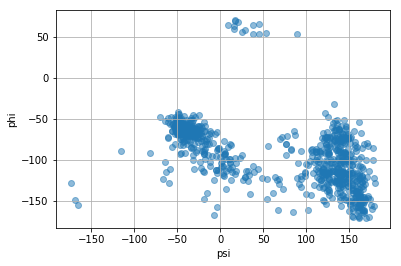

In [25]:
aa_input = str(input('Please enter AA name to build Ramachandran plot for (i.e. VAL).'))
df_aa_val = pdb_utilities.build_ramachandran_aa(aa_input)
pdb_utilities.plot_ramachandran(df_aa_val)

7. Analyze the length of bonds and the angle between different type of backbone atoms in
general and for individual AAs.

In [26]:
# df_atom = pd.read_csv('df_atom_export.csv')
protein_list = df_atom.drop_duplicates('protein_name')
# print(protein_list['protein_name'])

import math
import matplotlib.pyplot, pylab
import statistics

distance_list = []
def distance(x1, y1, z1, x2, y2, z2):  
       
    d = math.sqrt(math.pow(x2 - x1, 2) +
                math.pow(y2 - y1, 2) +
                math.pow(z2 - z1, 2)* 1.0) 
    distance_list.append(d)
    
def dis(protein):
    for index in protein.index:
        try:
            x1 = float(protein.iloc[index]['x'])
            y1 = float(protein.iloc[index]['y'])
            z1 = float(protein.iloc[index]['z'])
            x2 = float(protein.iloc[index+1]['x'])
            y2 = float(protein.iloc[index+1]['y'])
            z2 = float(protein.iloc[index+1]['z'])
            distance(x1, y1, z1, x2, y2, z2) 
        except IndexError:
            continue

for name in protein_list['protein_name']:
    df_pro_name = (df_atom[df_atom['protein_name'] == name])
    df_pro_name = (df_pro_name[df_pro_name['atom_name'] == 'CA']).reset_index(drop=True)
    dis(df_pro_name)

print('Distance from CA to CA')
print('Max:',max(distance_list))
print('Min:',min(distance_list))
print('Mean:',statistics.mean(distance_list))
print('Median:',statistics.median(distance_list))


Distance from CA to CA
Max: 27.650970236141806
Min: 0.006480740698414684
Mean: 3.8105225034325145
Median: 3.8044740766628773
